In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [2]:
dir(FD_RES)

[1] "A001_K562_WSTARRseq"  "KS91_K562_ASTARRseq"  "log"                 
[4] "Readme.md"            "region"               "source"              
[7] "Tewhey_K562_TileMPRA" "tmp221007"

In [3]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment_nuc")
fname = "KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.bed.gz"
fpath = file.path(fdiry, fname)
system(paste("zcat", fpath, "| head"), intern = TRUE)

[1] "#1_usercol\t2_usercol\t3_usercol\t4_usercol\t5_usercol\t6_usercol\t7_pct_at\t8_pct_gc\t9_num_A\t10_num_C\t11_num_G\t12_num_T\t13_num_N\t14_num_oth\t15_seq_len"
 [2] "chrX\t47787165\t47787363\tchrX_47787165_47787363\t1\t.\t0.560606\t0.439394\t33\t34\t53\t78\t0\t0\t198"                                                         
 [3] "chrX\t47787557\t47787773\tchrX_47787557_47787773\t1\t.\t0.615741\t0.384259\t45\t35\t48\t88\t0\t0\t216"                                                         
 [4] "chrX\t47787593\t47787783\tchrX_47787593_47787783\t1\t.\t0.636842\t0.363158\t42\t32\t37\t79\t0\t0\t190"                                                         
 [5] "chrX\t47787598\t47787772\tchrX_47787598_47787772\t1\t.\t0.637931\t0.362069\t37\t28\t35\t74\t0\t0\t174"                                                         
 [6] "chrX\t47787661\t47788058\tchrX_47787661_47788058\t1\t.\t0.594458\t0.405542\t76\t72\t89\t160\t0\t0\t397"                                                        
 [7] "chrX\t47787743\t47787849\tchrX_47787743_47787849\t1\t.\t0.528302\t0.471698\t15\t24\t26\t41\t0\t0\t106"                                                         
 [8] "chrX\t47787998\t47788231\tchrX_47787998_47788231\t1\t.\t0.536481\t0.463519\t35\t57\t51\t90\t0\t0\t233"                                                         
 [9] "chrX\t47788008\t47788157\tchrX_47788008_47788157\t1\t.\t0.543624\t0.456376\t23\t34\t34\t58\t0\t0\t149"                                                         
[10] "chrX\t47788008\t47788181\tchrX_47788008_47788181\t1\t.\t0.543353\t0.456647\t26\t39\t40\t68\t0\t0\t173"

In [4]:
PREFIX  = "KS91_K562_ASTARRseq"

REGIONS = c("GATA1", "MYC", "FADS")

GROUPS  = c("Input", "Output")

SAMPLES = c(
    paste0("Input_rep",  1:6),
    paste0("Output_rep", 1:4))

CNAMES = c("Chrom", "Start", "End", "Count")

get_info = function(fpath, strings){
    idx = str_detect(string = fpath, pattern = strings)
    return(strings[idx])
}

get_region = function(fpath){return(get_info(fpath, REGIONS))}
get_group  = function(fpath){return(get_info(fpath, GROUPS))}
get_sample = function(fpath){return(get_info(fpath, SAMPLES))}

In [5]:
prefix = "KS91_K562_hg38_ASTARRseq"
region = "GATA1"
strand = "unstranded"

fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment_nuc")
fname = paste(prefix, region, strand, "gz", sep="*")
fglob = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)

lst = lapply(fpaths, function(fpath){
    
    reg = get_region(fpath)
    grp = get_group(fpath)
    sam = get_sample(fpath)
    dat = read_tsv(fpath, show_col_types = FALSE) %>% 
        dplyr::mutate(
            Chrom  = `#1_usercol`,
            Start  = `2_usercol`,
            End    = `3_usercol`,
            Name   = `4_usercol`,
            Count  = `5_usercol`,
            Strand = `6_usercol`,
            Pct_GC = `8_pct_gc`,
            Len    = `15_seq_len`,
            Loc    = (Start + End) / 2,
            Sample = sam,
            Group  = grp,
            Region = reg) %>%
        dplyr::select(Chrom, , Start, End, Name, Count, Sample, Group, Region, Pct_GC, Loc, Len)
    return(dat)
})

dat_astarr_gata1 = bind_rows(lst)
head(dat_astarr_gata1)

Chrom,Start,End,Name,Count,Sample,Group,Region,Pct_GC,Loc,Len
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47787165,47787363,chrX_47787165_47787363,1,Input_rep1,Input,GATA1,0.439394,47787264,198
chrX,47787557,47787773,chrX_47787557_47787773,1,Input_rep1,Input,GATA1,0.384259,47787665,216
chrX,47787593,47787783,chrX_47787593_47787783,1,Input_rep1,Input,GATA1,0.363158,47787688,190
chrX,47787598,47787772,chrX_47787598_47787772,1,Input_rep1,Input,GATA1,0.362069,47787685,174
chrX,47787661,47788058,chrX_47787661_47788058,1,Input_rep1,Input,GATA1,0.405542,47787860,397
chrX,47787743,47787849,chrX_47787743_47787849,1,Input_rep1,Input,GATA1,0.471698,47787796,106


In [6]:
prefix = "KS91_K562_hg38_ASTARRseq"
region = "MYC"
strand = "unstranded"

fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment_nuc")
fname = paste(prefix, region, strand, "gz", sep="*")
fglob = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)

lst = lapply(fpaths, function(fpath){
    
    reg = get_region(fpath)
    grp = get_group(fpath)
    sam = get_sample(fpath)
    dat = read_tsv(fpath, show_col_types = FALSE) %>% 
        dplyr::mutate(
            Chrom  = `#1_usercol`,
            Start  = `2_usercol`,
            End    = `3_usercol`,
            Name   = `4_usercol`,
            Count  = `5_usercol`,
            Strand = `6_usercol`,
            Pct_GC = `8_pct_gc`,
            Len    = `15_seq_len`,
            Loc    = (Start + End) / 2,
            Sample = sam,
            Group  = grp,
            Region = reg) %>%
        dplyr::select(Chrom, , Start, End, Name, Count, Sample, Group, Region, Pct_GC, Loc, Len)
    return(dat)
})

dat_astarr_myc = bind_rows(lst)
head(dat_astarr_myc)

Chrom,Start,End,Name,Count,Sample,Group,Region,Pct_GC,Loc,Len
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr8,126735990,126736404,chr8_126735990_126736404,1,Input_rep1,Input,MYC,0.432367,126736197,414
chr8,126736004,126736113,chr8_126736004_126736113,1,Input_rep1,Input,MYC,0.385321,126736058,109
chr8,126736010,126736129,chr8_126736010_126736129,1,Input_rep1,Input,MYC,0.386555,126736070,119
chr8,126736025,126736241,chr8_126736025_126736241,1,Input_rep1,Input,MYC,0.453704,126736133,216
chr8,126736083,126736313,chr8_126736083_126736313,1,Input_rep1,Input,MYC,0.491304,126736198,230
chr8,126736084,126736273,chr8_126736084_126736273,1,Input_rep1,Input,MYC,0.502645,126736178,189


In [7]:
dat = dat_astarr_gata1
dat = dat %>% group_by(Group) %>% summarize(
    Pct_GC_mu = mean(Pct_GC),
    Pct_GC_sd = sd(Pct_GC),
    Pct_GC_md = median(Pct_GC),
    Pct_GC_q1 = quantile(Pct_GC, 0.25),
    Pct_GC_q3 = quantile(Pct_GC, 0.75)) 
dat

Group,Pct_GC_mu,Pct_GC_sd,Pct_GC_md,Pct_GC_q1,Pct_GC_q3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Input,0.5473073,0.09540216,0.544186,0.484076,0.610738
Output,0.5423990,0.09241614,0.544910,0.481356,0.605882


In [8]:
dat = dat_astarr_myc
dat = dat %>% group_by(Group) %>% summarize(
    Pct_GC_mu = mean(Pct_GC),
    Pct_GC_sd = sd(Pct_GC),
    Pct_GC_md = median(Pct_GC),
    Pct_GC_q1 = quantile(Pct_GC, 0.25),
    Pct_GC_q3 = quantile(Pct_GC, 0.75)) 
dat

Group,Pct_GC_mu,Pct_GC_sd,Pct_GC_md,Pct_GC_q1,Pct_GC_q3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Input,0.4648996,0.08191142,0.462162,0.408509,0.516279
Output,0.4642552,0.08017085,0.464883,0.409302,0.519231


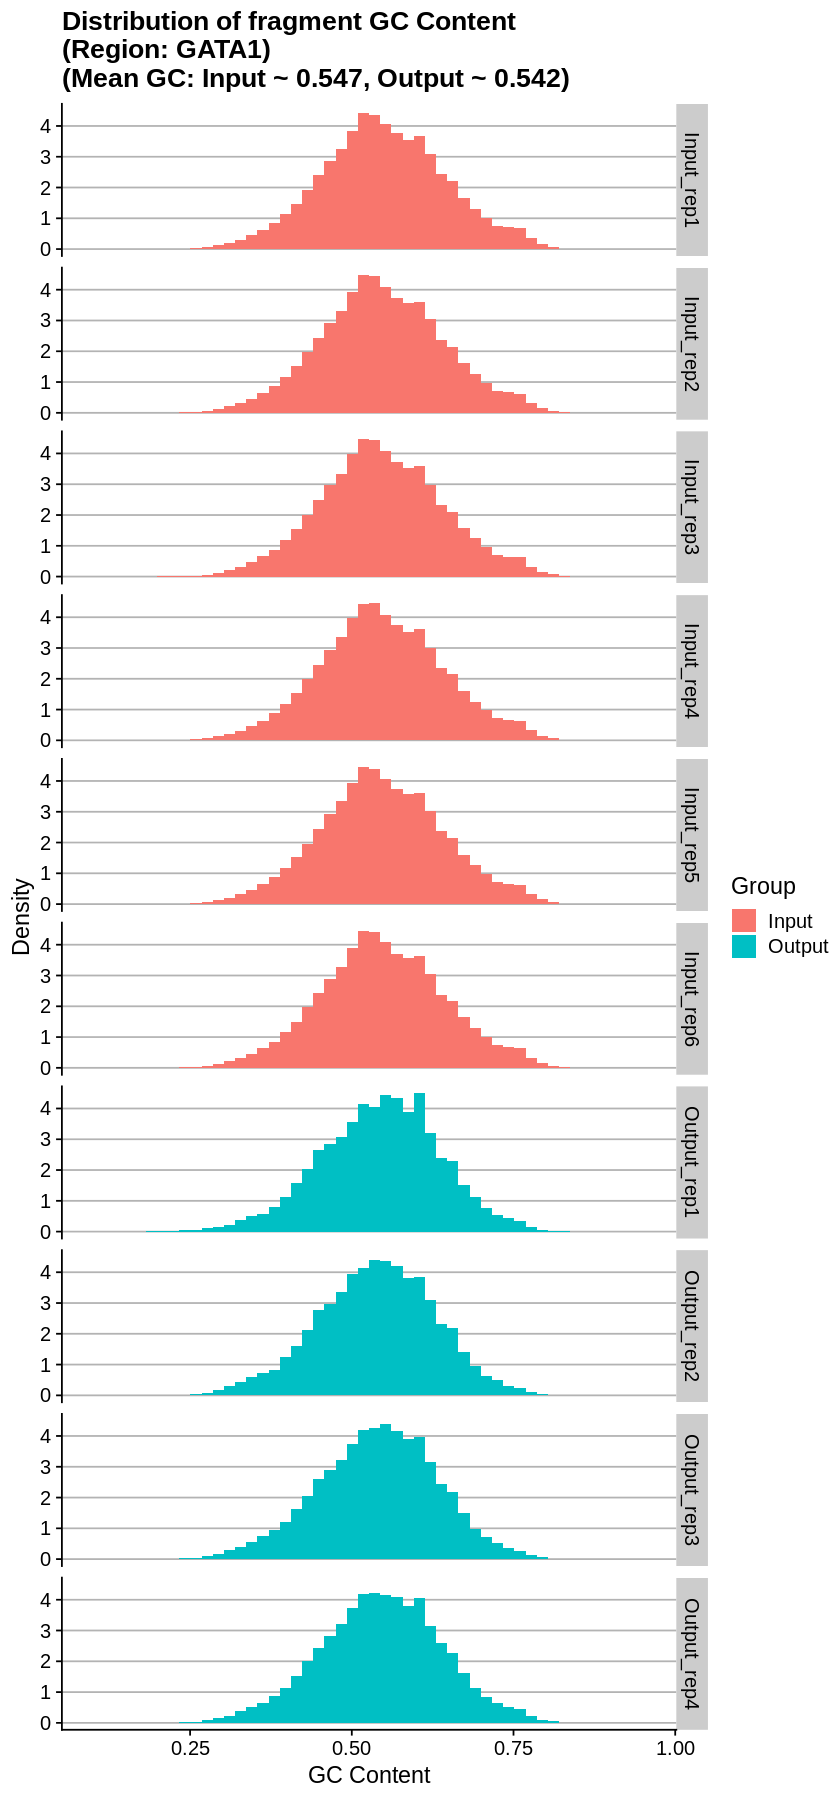

In [9]:
dat = dat_astarr_gata1
gpt = ggplot(dat, aes(x=Pct_GC, fill=Group)) + 
    geom_histogram(aes(y = ..density..), bins=50) + 
    labs(x="GC Content", 
         y="Density", 
         title=paste(
             "Distribution of fragment GC Content", 
             "(Region: GATA1)", 
             "(Mean GC: Input ~ 0.547, Output ~ 0.542)",
             sep = "\n")) +
    theme_cowplot() + 
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1)) +
    facet_grid(Sample~.)

options(repr.plot.height=15, repr.plot.width=7)
print(gpt)

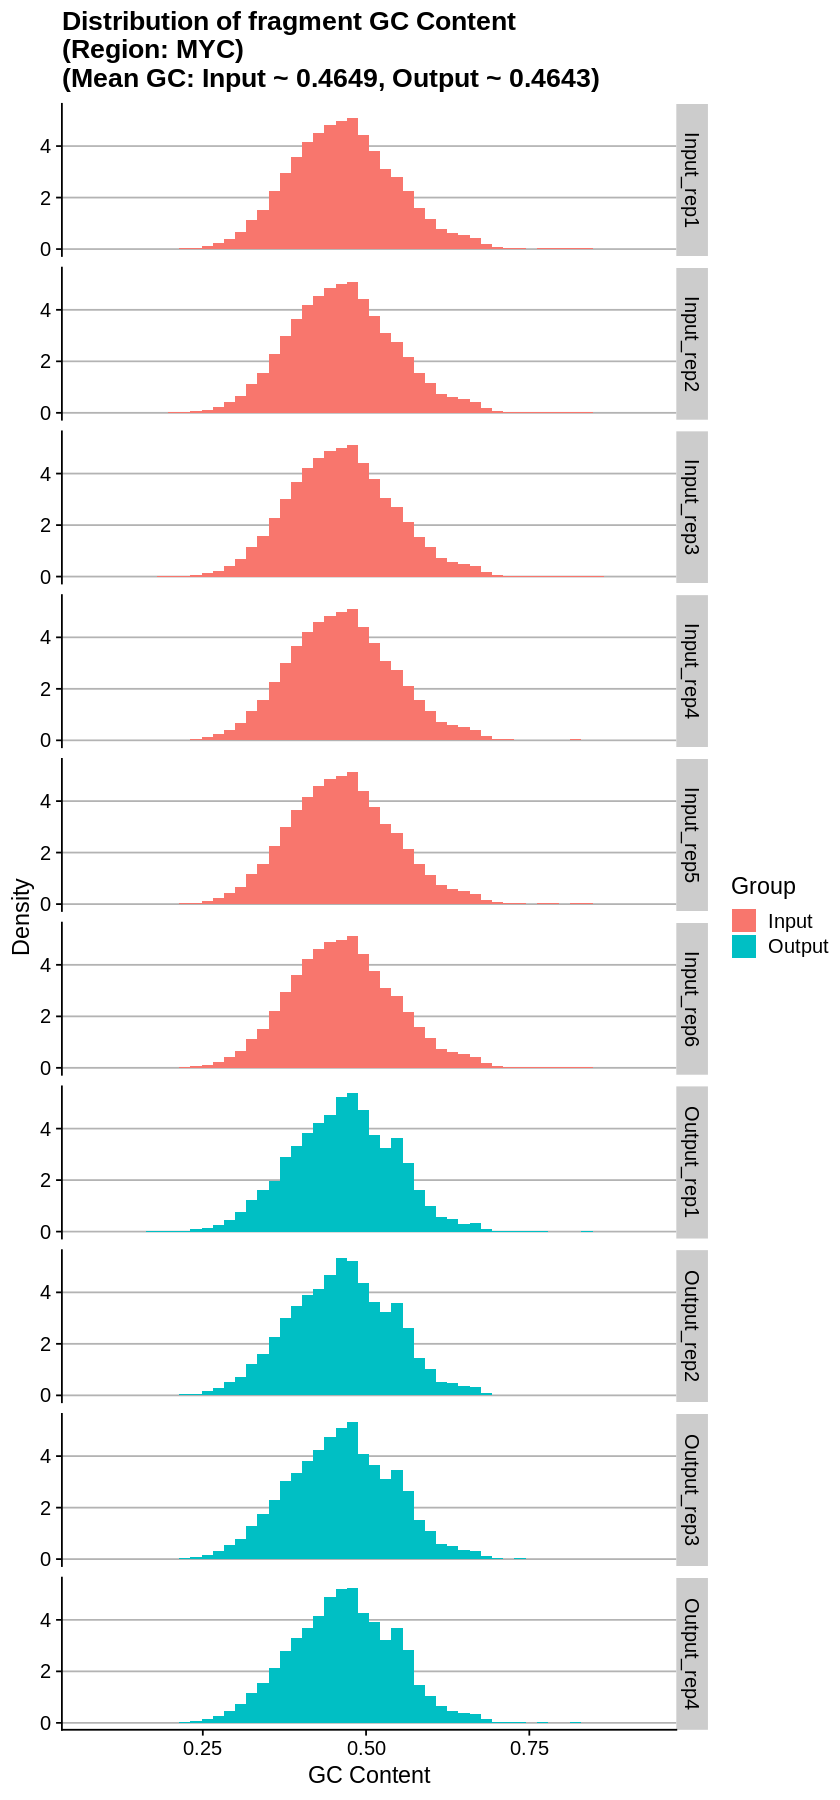

In [10]:
dat = dat_astarr_myc
gpt = ggplot(dat, aes(x=Pct_GC, fill=Group)) + 
    geom_histogram(aes(y = ..density..), bins=50) + 
    labs(x="GC Content", 
         y="Density", 
         title=paste(
             "Distribution of fragment GC Content", 
             "(Region: MYC)", 
             "(Mean GC: Input ~ 0.4649, Output ~ 0.4643)",
             sep = "\n")) +
    theme_cowplot() + 
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1)) +
    facet_grid(Sample~.)

options(repr.plot.height=15, repr.plot.width=7)
print(gpt)

## Length

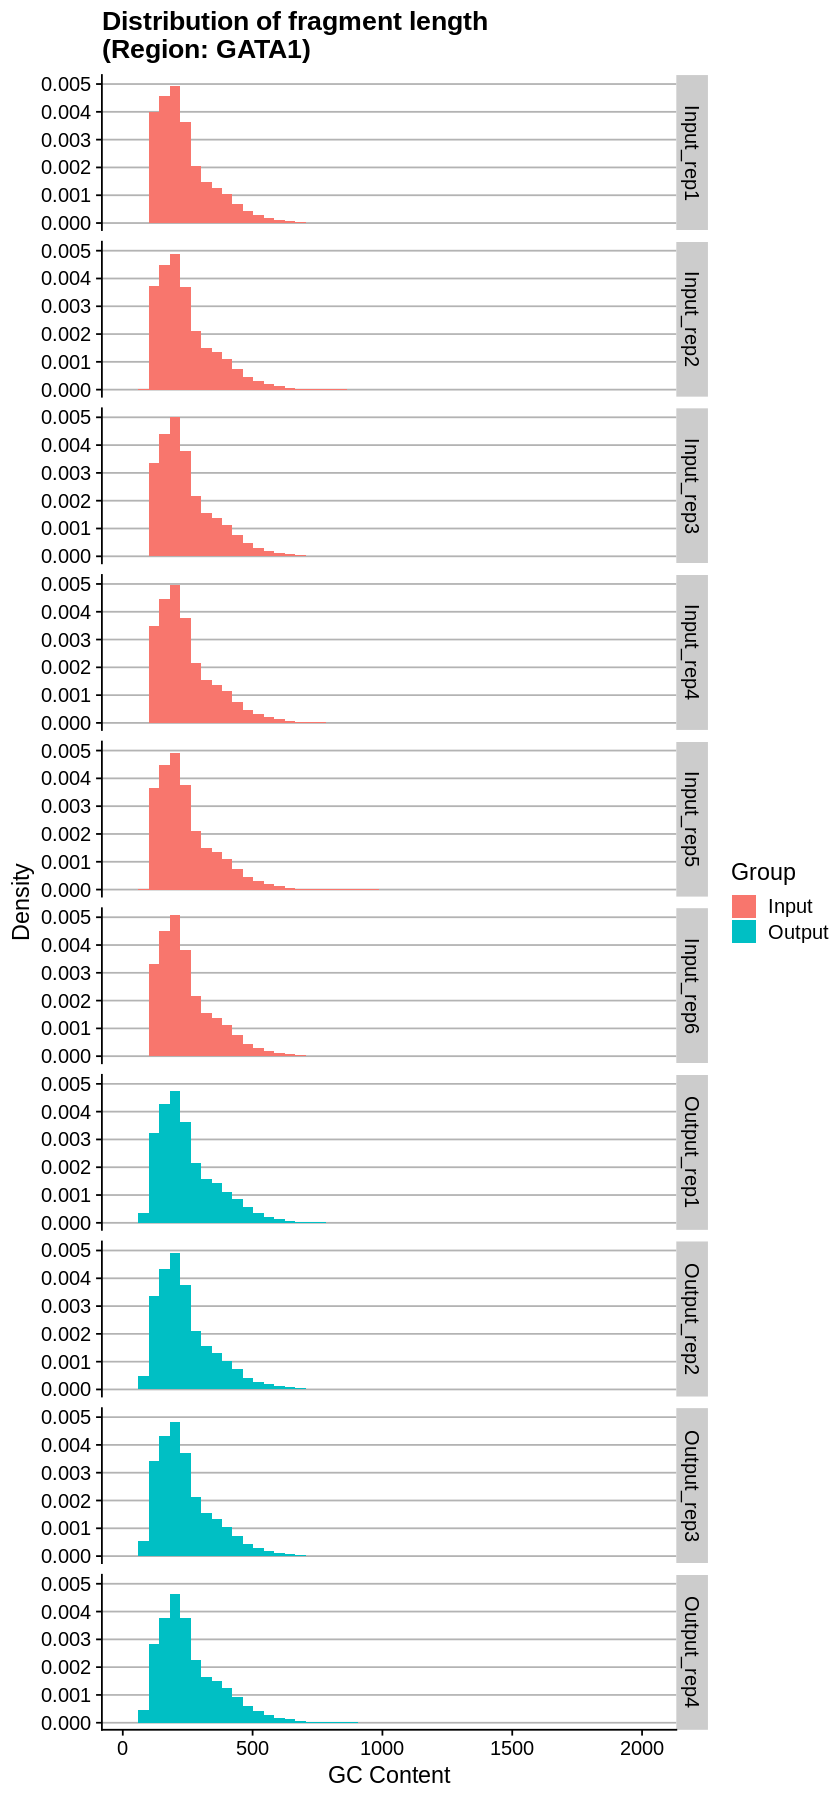

In [11]:
dat = dat_astarr_gata1
gpt = ggplot(dat, aes(x=Len, fill=Group)) + 
    geom_histogram(aes(y = ..density..), bins=50) + 
    labs(x="GC Content", 
         y="Density", 
         title=paste(
             "Distribution of fragment length", 
             "(Region: GATA1)",
             sep = "\n")) +
    theme_cowplot() + 
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1)) +
    facet_grid(Sample~.)

options(repr.plot.height=15, repr.plot.width=7)
print(gpt)

In [12]:
dat = dat_astarr_gata1
summary(dat$Len)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   24.0   166.0   217.0   245.3   297.0  1995.0 

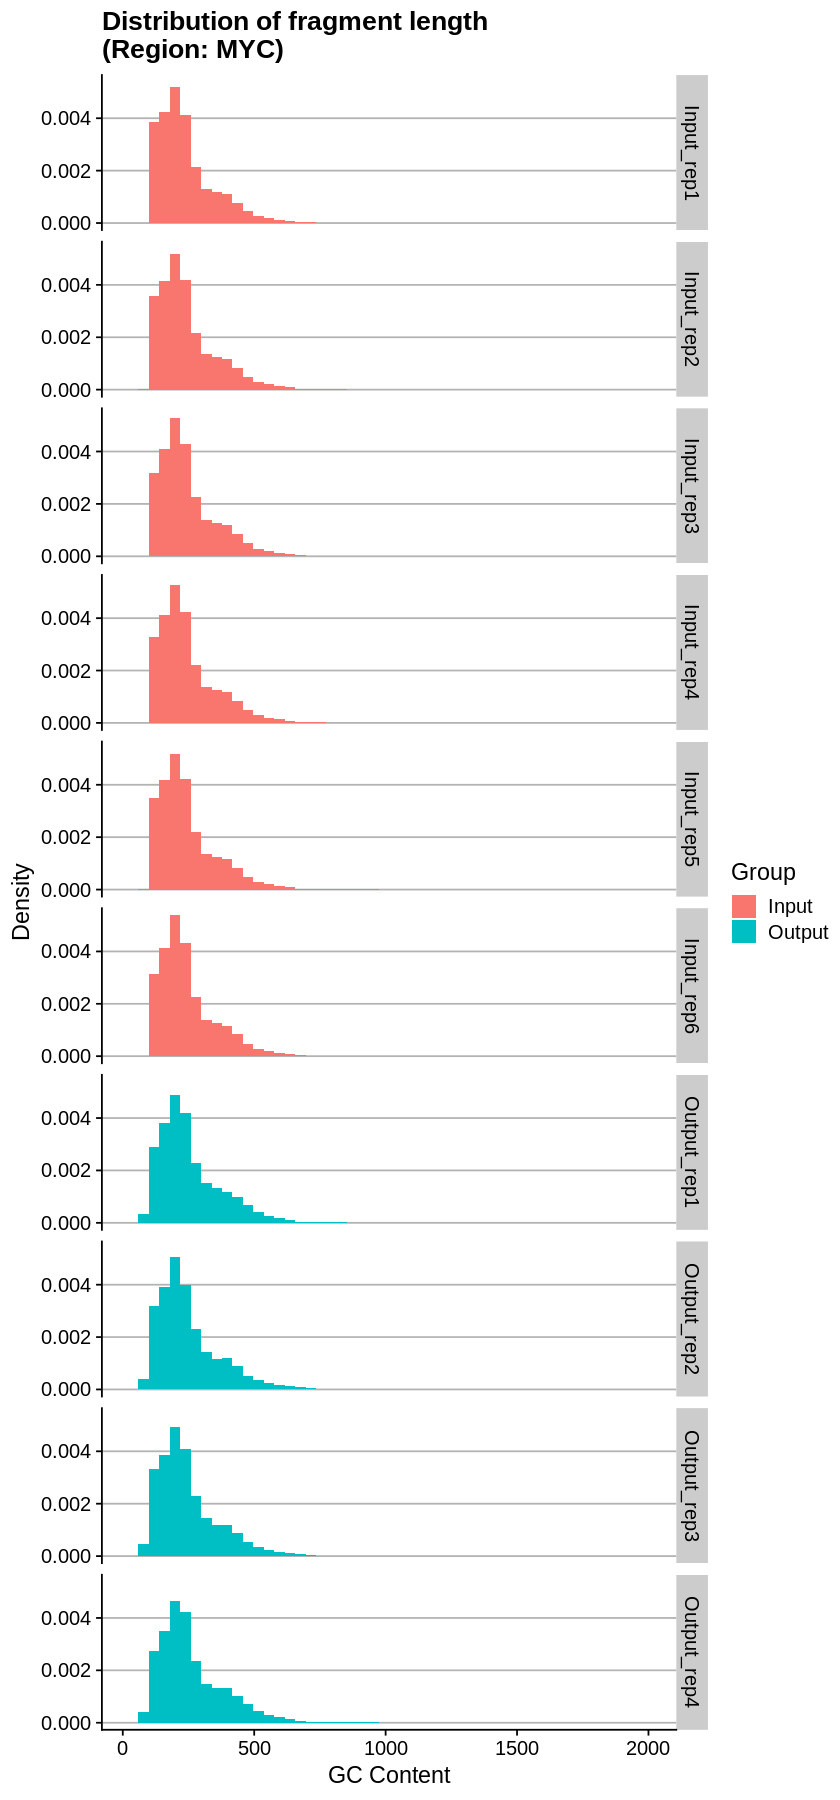

In [13]:
dat = dat_astarr_myc
gpt = ggplot(dat, aes(x=Len, fill=Group)) + 
    geom_histogram(aes(y = ..density..), bins=50) + 
    labs(x="GC Content", 
         y="Density", 
         title=paste(
             "Distribution of fragment length", 
             "(Region: MYC)",
             sep = "\n")) +
    theme_cowplot() + 
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1)) +
    facet_grid(Sample~.)

options(repr.plot.height=15, repr.plot.width=7)
print(gpt)

## GC vs Length

In [14]:
dat = dat_astarr_gata1
dat = dat %>% 
    group_by(Sample) %>%
    mutate(Cat = as.numeric(cut(Pct_GC, breaks=10))) %>% 
    mutate(Cat = paste0("Q", Cat))
head(dat)

Chrom,Start,End,Name,Count,Sample,Group,Region,Pct_GC,Loc,Len,Cat
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
chrX,47787165,47787363,chrX_47787165_47787363,1,Input_rep1,Input,GATA1,0.439394,47787264,198,Q5
chrX,47787557,47787773,chrX_47787557_47787773,1,Input_rep1,Input,GATA1,0.384259,47787665,216,Q4
chrX,47787593,47787783,chrX_47787593_47787783,1,Input_rep1,Input,GATA1,0.363158,47787688,190,Q4
chrX,47787598,47787772,chrX_47787598_47787772,1,Input_rep1,Input,GATA1,0.362069,47787685,174,Q4
chrX,47787661,47788058,chrX_47787661_47788058,1,Input_rep1,Input,GATA1,0.405542,47787860,397,Q4
chrX,47787743,47787849,chrX_47787743_47787849,1,Input_rep1,Input,GATA1,0.471698,47787796,106,Q5


In [16]:
binning = function(x){
    p = seq(0, 1, by = 0.1)
    q = quantile(x, probs = p)
    y = cut(x, breaks=q, include.lowest = TRUE)
    return(y)
}

bin2cat = function(x){
    p = seq(0, 1, by = 0.1)
    q = quantile(x, probs = p)
    y = cut(x, breaks=q, include.lowest = TRUE)
    y = paste0("Q", as.numeric(y))
    return(y)
}

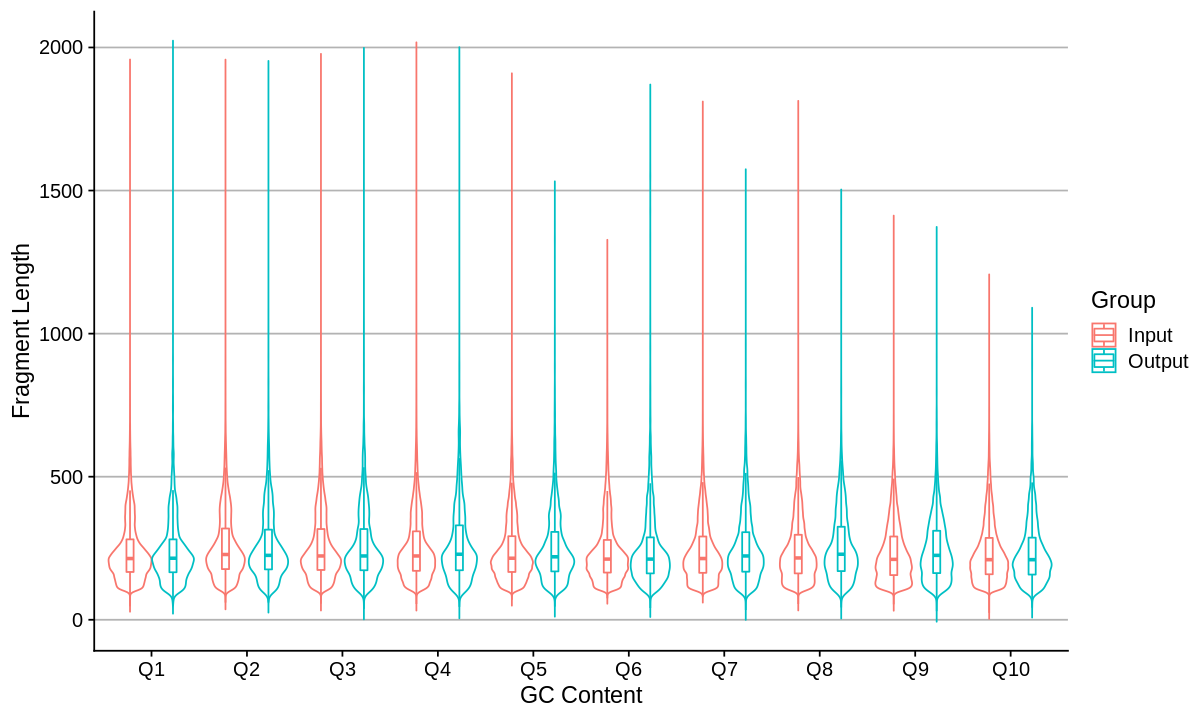

In [17]:
dat = dat_astarr_gata1
dat = dat %>% mutate(Cat = bin2cat(Pct_GC))
dat$Cat = factor(dat$Cat, levels=paste0("Q", 1:10))

gpt = ggplot(dat, aes(x=Cat, y=Len)) + 
    geom_violin( aes(color = Group), trim = FALSE, position = position_dodge(0.9)) +
    geom_boxplot(aes(color = Group), width = 0.15, position = position_dodge(0.9), outlier.shape = NA) +
    labs(x="GC Content", y="Fragment Length") +
    theme_cowplot() + 
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1))

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

## location

In [18]:
dat = dat_astarr_gata1
dat = dat %>% dplyr::filter(Sample == "Input_rep1")
head(dat)

Chrom,Start,End,Name,Count,Sample,Group,Region,Pct_GC,Loc,Len
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47787165,47787363,chrX_47787165_47787363,1,Input_rep1,Input,GATA1,0.439394,47787264,198
chrX,47787557,47787773,chrX_47787557_47787773,1,Input_rep1,Input,GATA1,0.384259,47787665,216
chrX,47787593,47787783,chrX_47787593_47787783,1,Input_rep1,Input,GATA1,0.363158,47787688,190
chrX,47787598,47787772,chrX_47787598_47787772,1,Input_rep1,Input,GATA1,0.362069,47787685,174
chrX,47787661,47788058,chrX_47787661_47788058,1,Input_rep1,Input,GATA1,0.405542,47787860,397
chrX,47787743,47787849,chrX_47787743_47787849,1,Input_rep1,Input,GATA1,0.471698,47787796,106


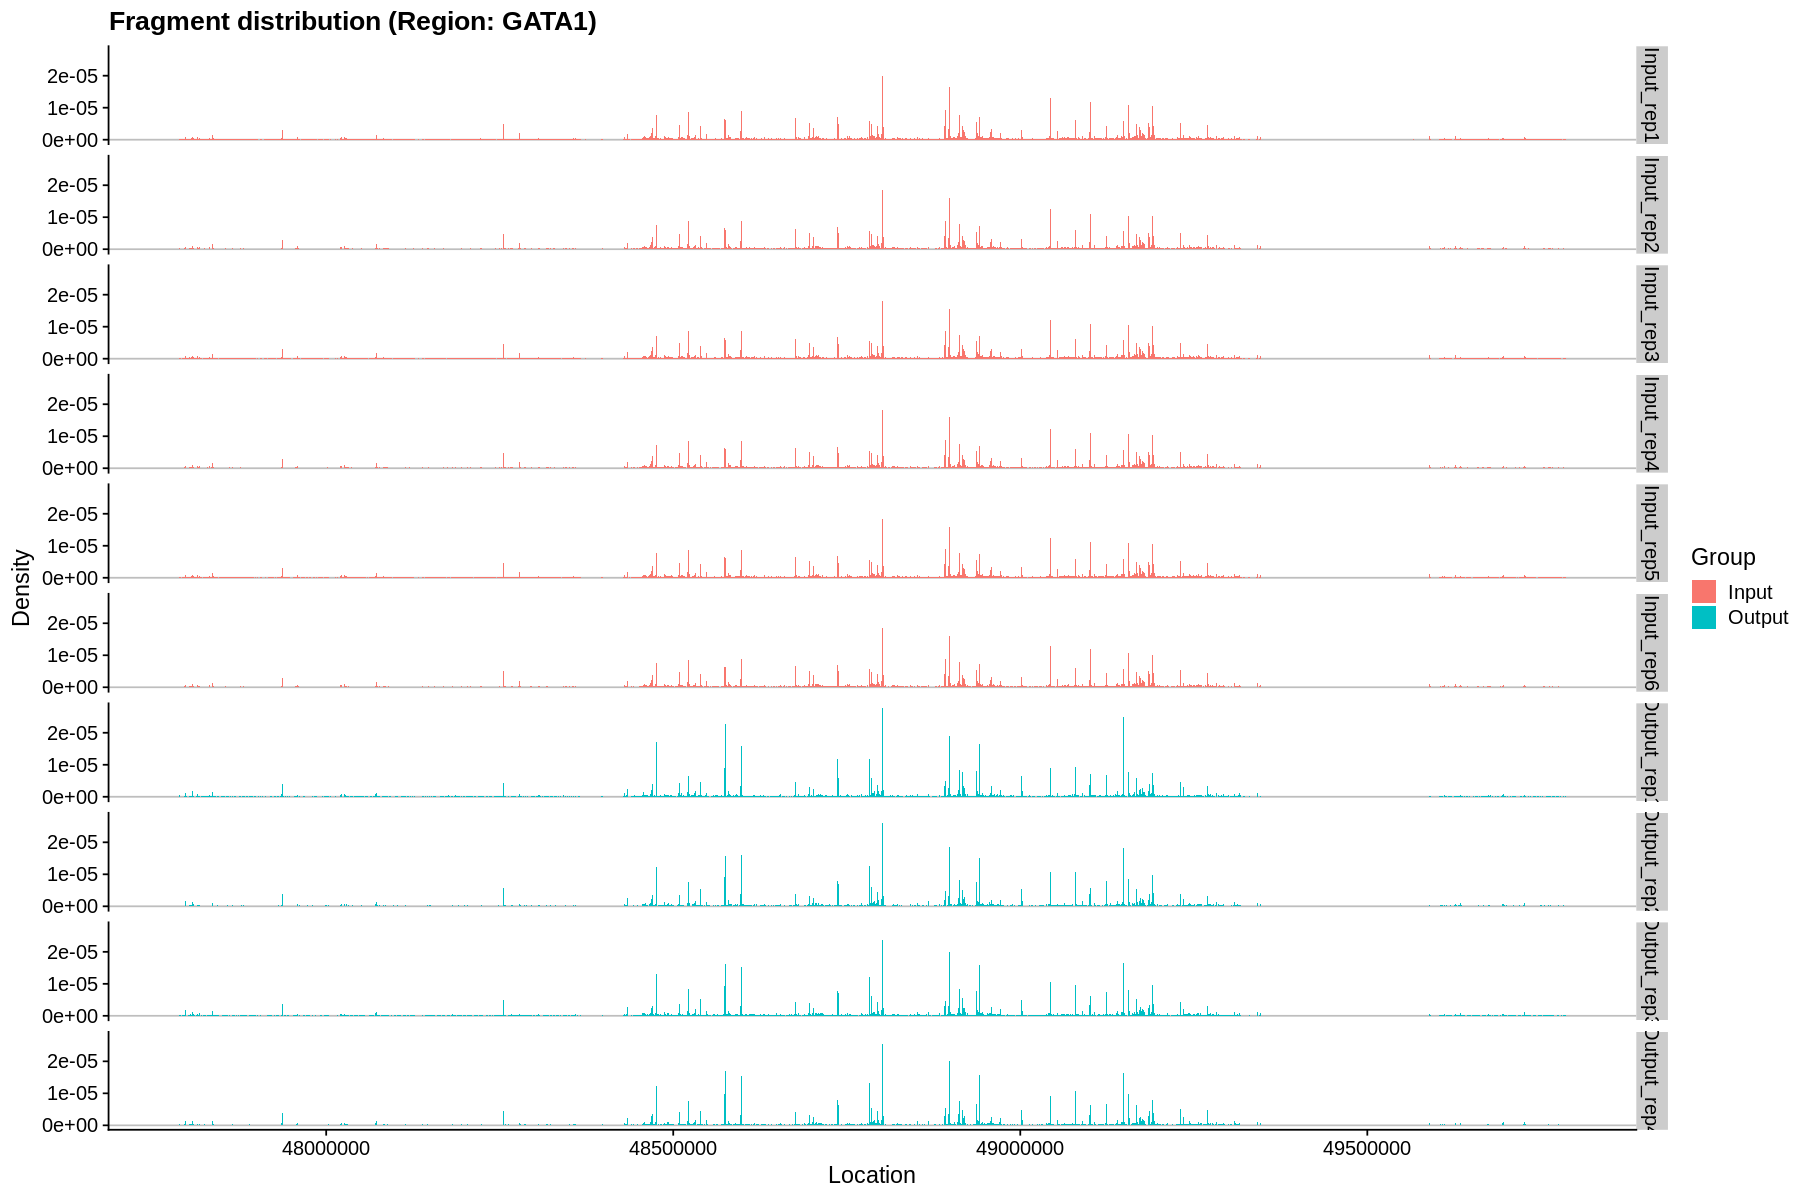

In [19]:
dat = dat_astarr_gata1
gpt = ggplot(dat, aes(x=Loc, fill=Group)) + 
    geom_hline(yintercept = 0, color="grey50", alpha=0.5) +    
    geom_histogram(aes(y=..density..), binwidth=1000) + 
    labs(x="Location", y="Density", title="Fragment distribution (Region: GATA1)") +
    theme_cowplot() +
    facet_grid(Sample~.)

options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

Warning message:
“Removed 479150 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 20 rows containing missing values (geom_bar).”


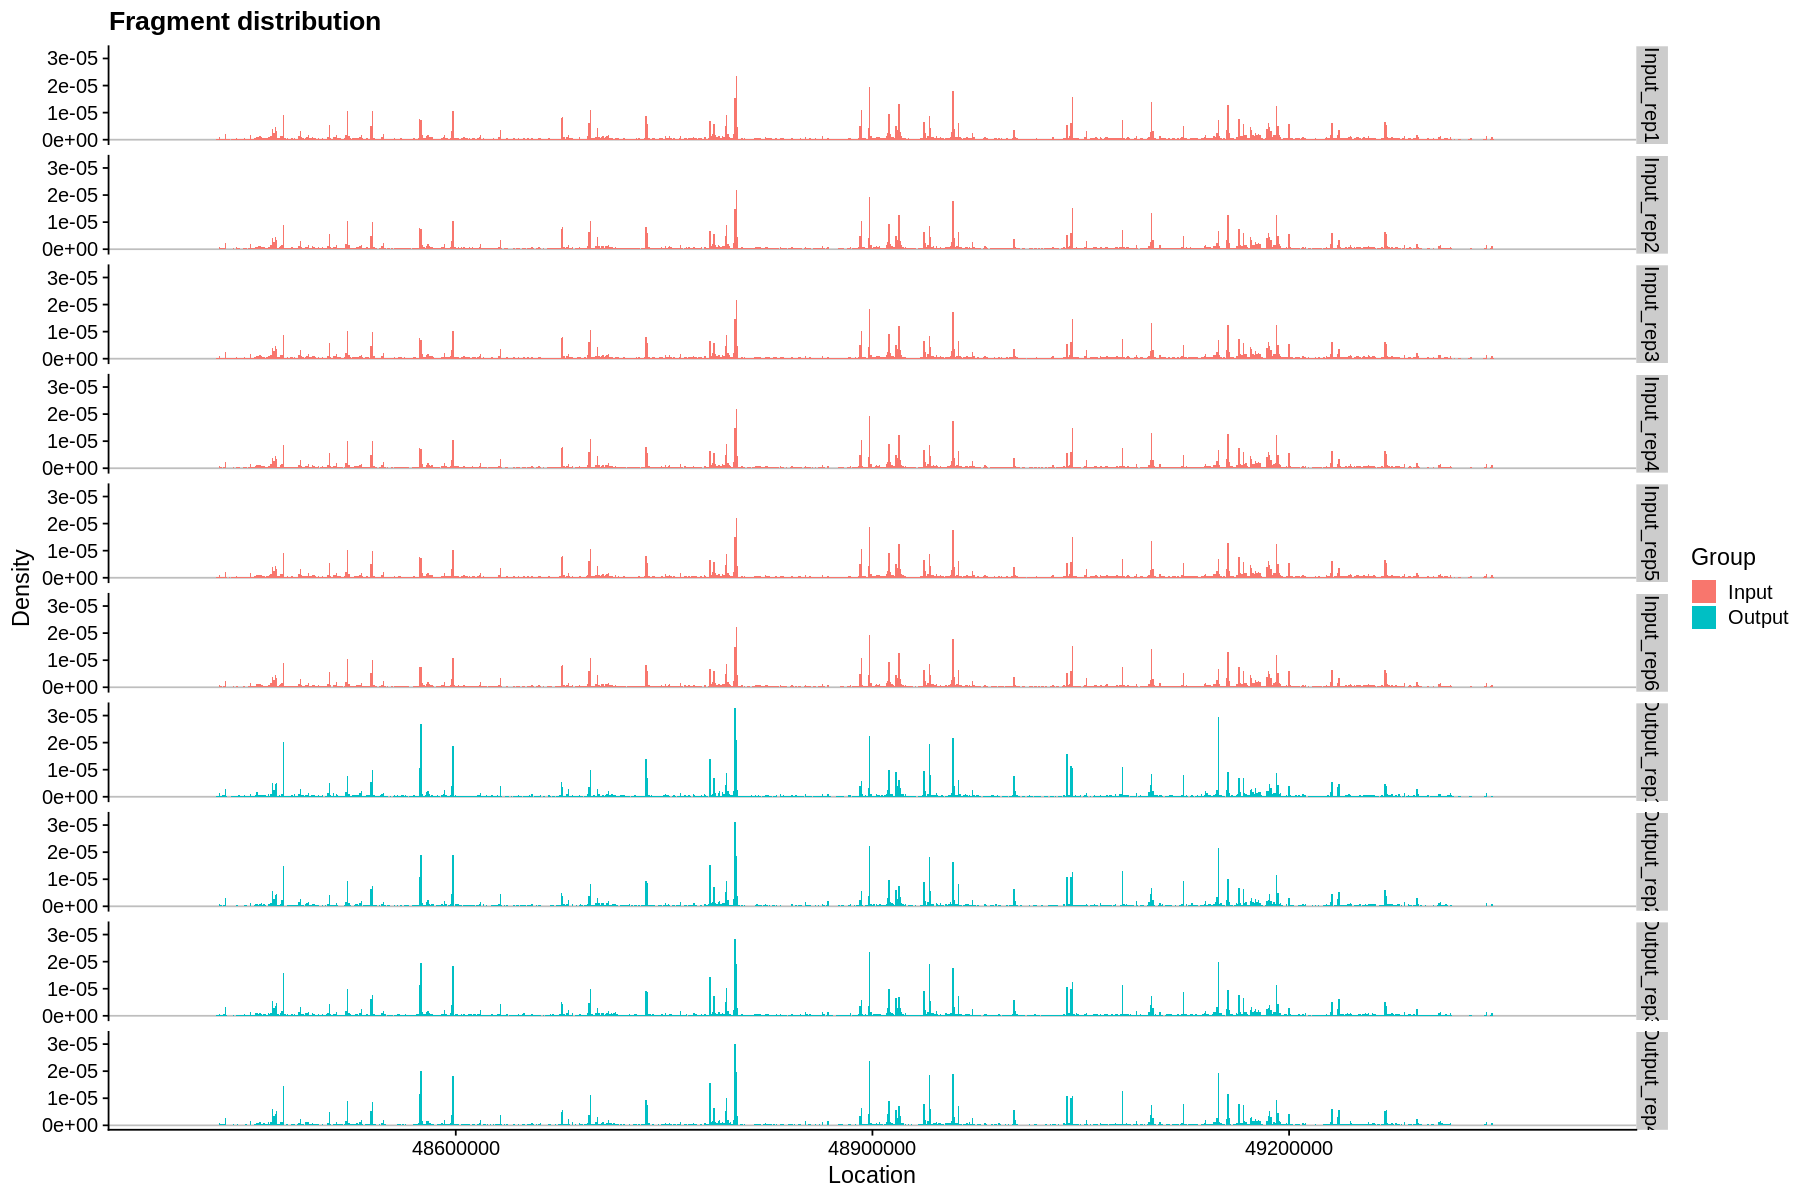

In [82]:
dat = dat_astarr_gata1
gpt = ggplot(dat, aes(x=Loc, fill=Group)) + 
    geom_hline(yintercept = 0, color="grey50", alpha=0.5) +    
    geom_histogram(aes(y=..density..), binwidth=1000) + 
    xlim(48400000, 49400000) +
    labs(x="Location", y="Density", title="Fragment distribution (Region: GATA1; 48400,000-49400,000)") +
    theme_cowplot() +
    facet_grid(Sample~.)

options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

In [73]:
dat = dat_astarr_gata1
tmp = dat %>% group_by(Sample) %>% summarize(Count = n())
print(tmp)
cat("++++++++++++++++++++++++++++++\n")
dat = dat %>% 
    group_by(Sample) %>%
    slice_max(order_by=Pct_GC, prop=0.10)
tmp = dat %>% group_by(Sample) %>% summarize(Count = n())
print(tmp)

# A tibble: 10 × 2
   Sample       Count
   <chr>        <int>
 1 Input_rep1  358823
 2 Input_rep2  461577
 3 Input_rep3  496229
 4 Input_rep4  464845
 5 Input_rep5  454013
 6 Input_rep6  409058
 7 Output_rep1  42858
 8 Output_rep2  70548
 9 Output_rep3  76087
10 Output_rep4 132149
++++++++++++++++++++++++++++++
# A tibble: 10 × 2
   Sample      Count
   <chr>       <int>
 1 Input_rep1  35900
 2 Input_rep2  46172
 3 Input_rep3  49623
 4 Input_rep4  46493
 5 Input_rep5  45418
 6 Input_rep6  40946
 7 Output_rep1  4286
 8 Output_rep2  7054
 9 Output_rep3  7609
10 Output_rep4 13226


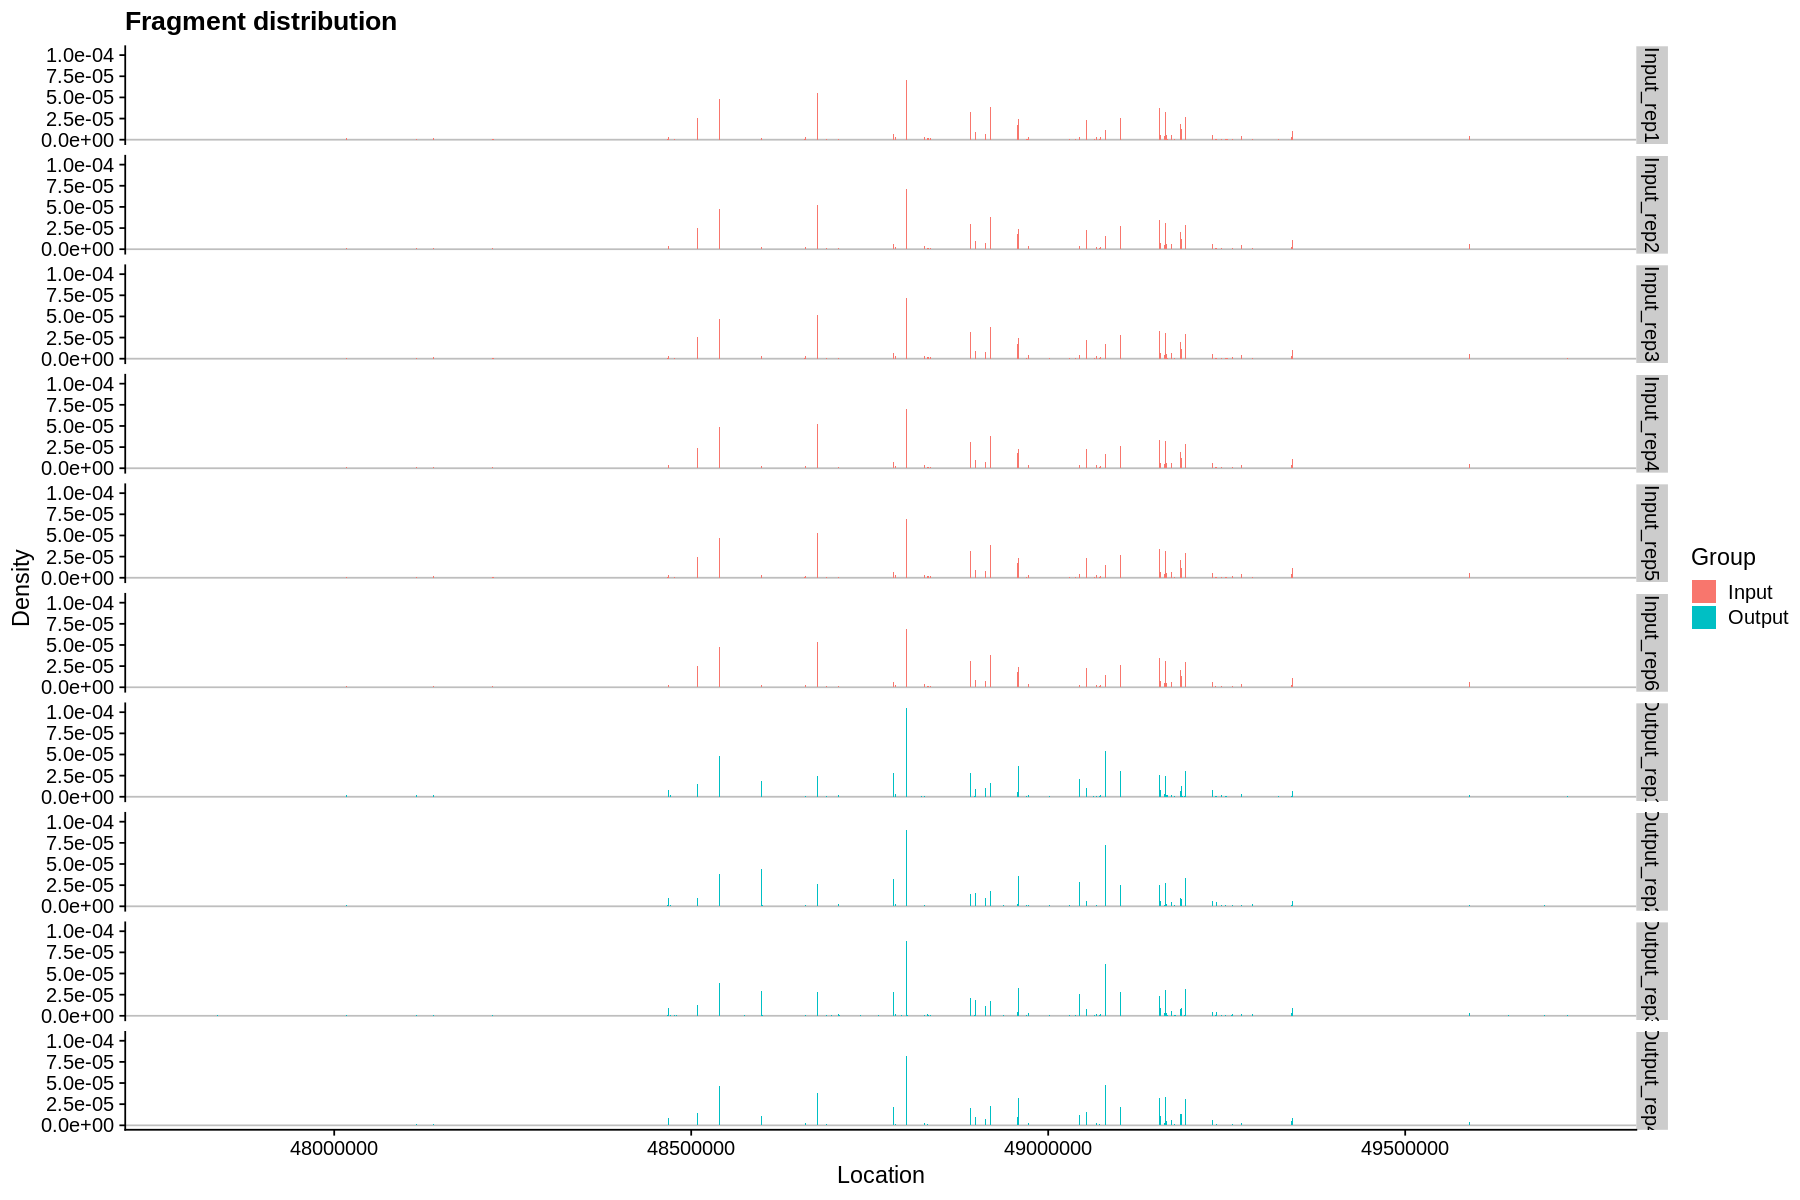

In [83]:
dat = dat_astarr_gata1
dat = dat %>% 
    group_by(Sample) %>%
    slice_max(order_by=Pct_GC, prop=0.10)

gpt = ggplot(dat, aes(x=Loc, fill=Group)) + 
    geom_hline(yintercept = 0, color="grey50", alpha=0.5) +    
    geom_histogram(aes(y=..density..), binwidth=1000) + 
    labs(x="Location", y="Density", title="Fragment distribution") +
    theme_cowplot() +
    facet_grid(Sample~.)

options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

Warning message:
“Removed 4313 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 20 rows containing missing values (geom_bar).”


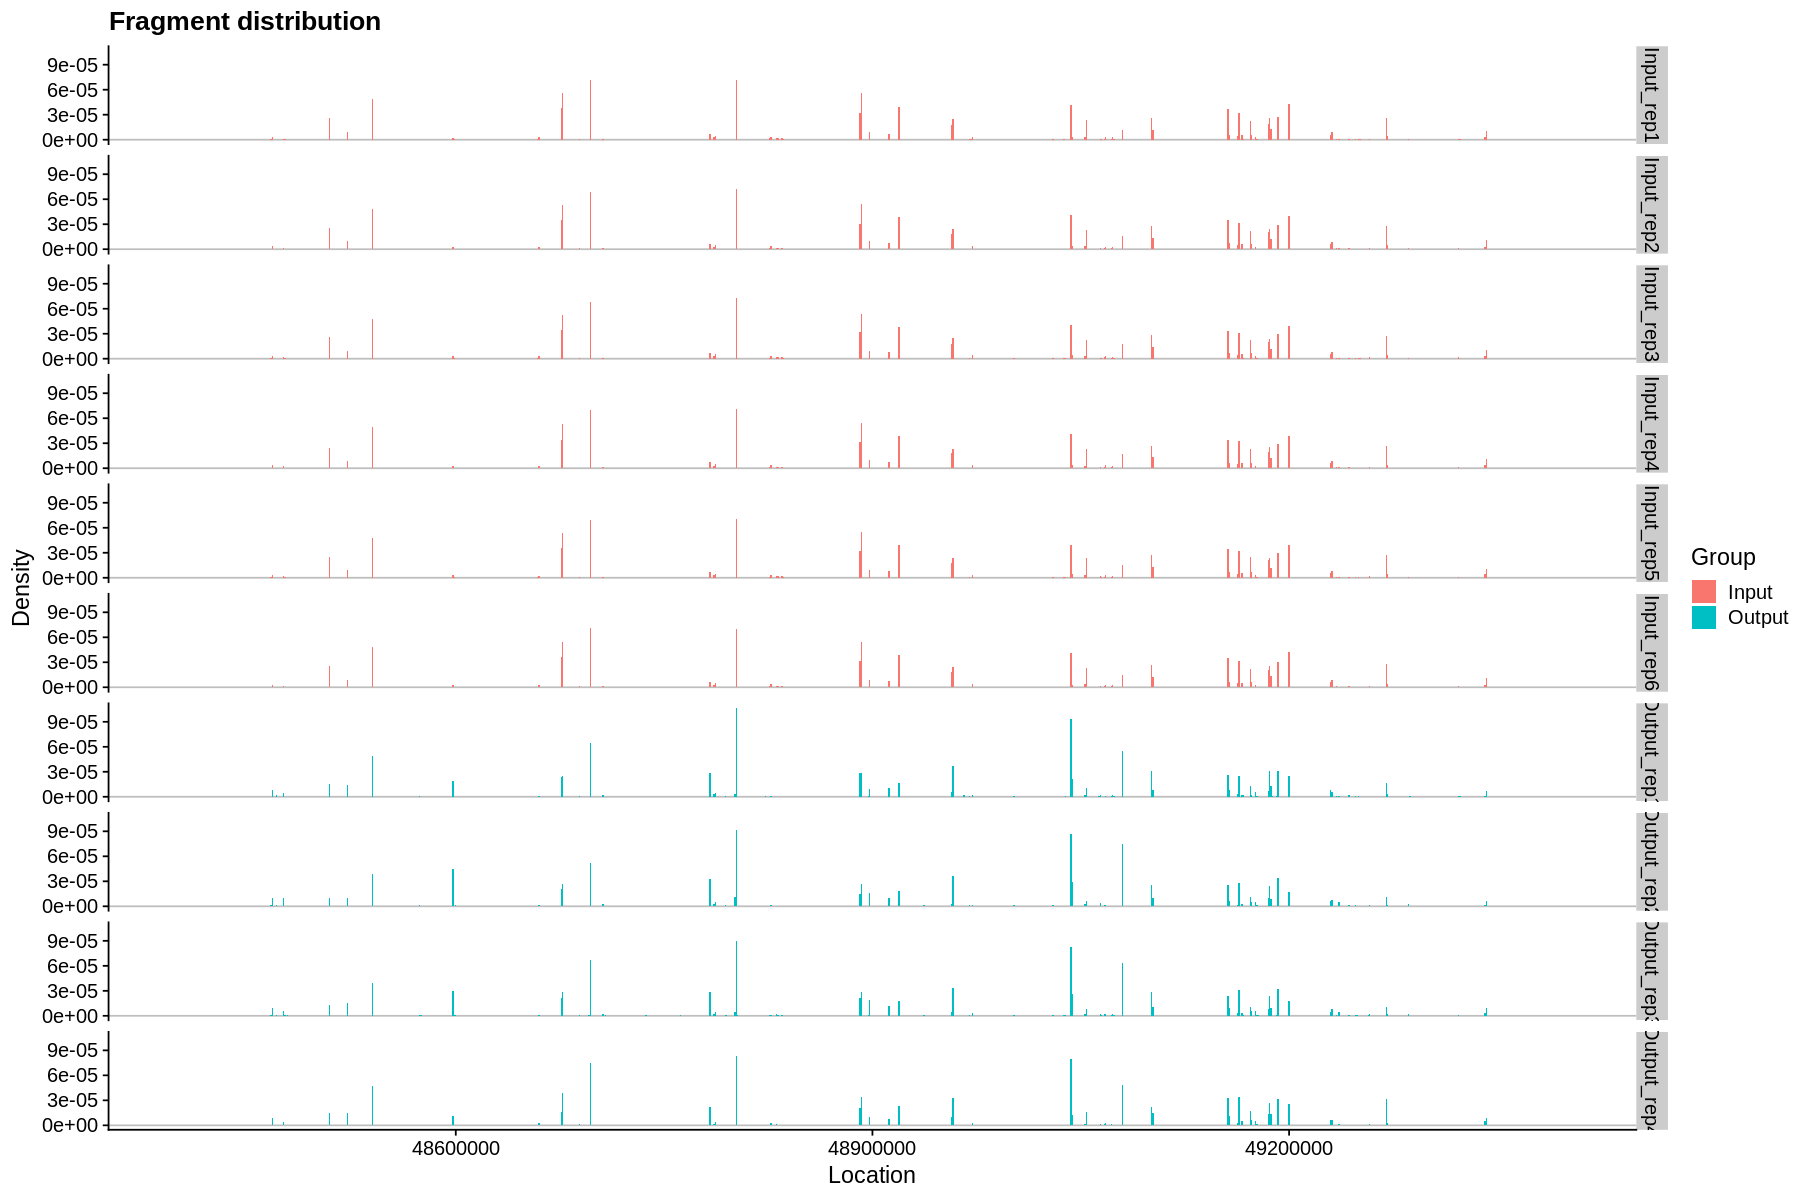

In [84]:
dat = dat_astarr_gata1
dat = dat %>% 
    group_by(Sample) %>%
    slice_max(order_by=Pct_GC, prop=0.10)

gpt = ggplot(dat, aes(x=Loc, fill=Group)) + 
    geom_hline(yintercept = 0, color="grey50", alpha=0.5) +    
    geom_histogram(aes(y=..density..), binwidth=1000) + 
    xlim(48400000, 49400000) +
    labs(x="Location", y="Density", title="Fragment distribution") +
    theme_cowplot() +
    facet_grid(Sample~.)

options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

In [71]:
dat = dat_astarr_gata1
dat = dat %>% dplyr::filter(Sample == "Input_rep1") %>% slice_max(order_by=Pct_GC, prop=0.10)

print(dim(dat))
head(dat)

[1] 35900    11


Chrom,Start,End,Name,Count,Sample,Group,Region,Pct_GC,Loc,Len
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,48659302,48659428,chrX_48659302_48659428,1,Input_rep1,Input,GATA1,0.857143,48659365,126
chrX,48659547,48659676,chrX_48659547_48659676,1,Input_rep1,Input,GATA1,0.852713,48659612,129
chrX,48957411,48957539,chrX_48957411_48957539,1,Input_rep1,Input,GATA1,0.851562,48957475,128
chrX,48957389,48957537,chrX_48957389_48957537,1,Input_rep1,Input,GATA1,0.851351,48957463,148
chrX,48659537,48659666,chrX_48659537_48659666,1,Input_rep1,Input,GATA1,0.844961,48659602,129
chrX,49200196,49200303,chrX_49200196_49200303,1,Input_rep1,Input,GATA1,0.841121,49200250,107


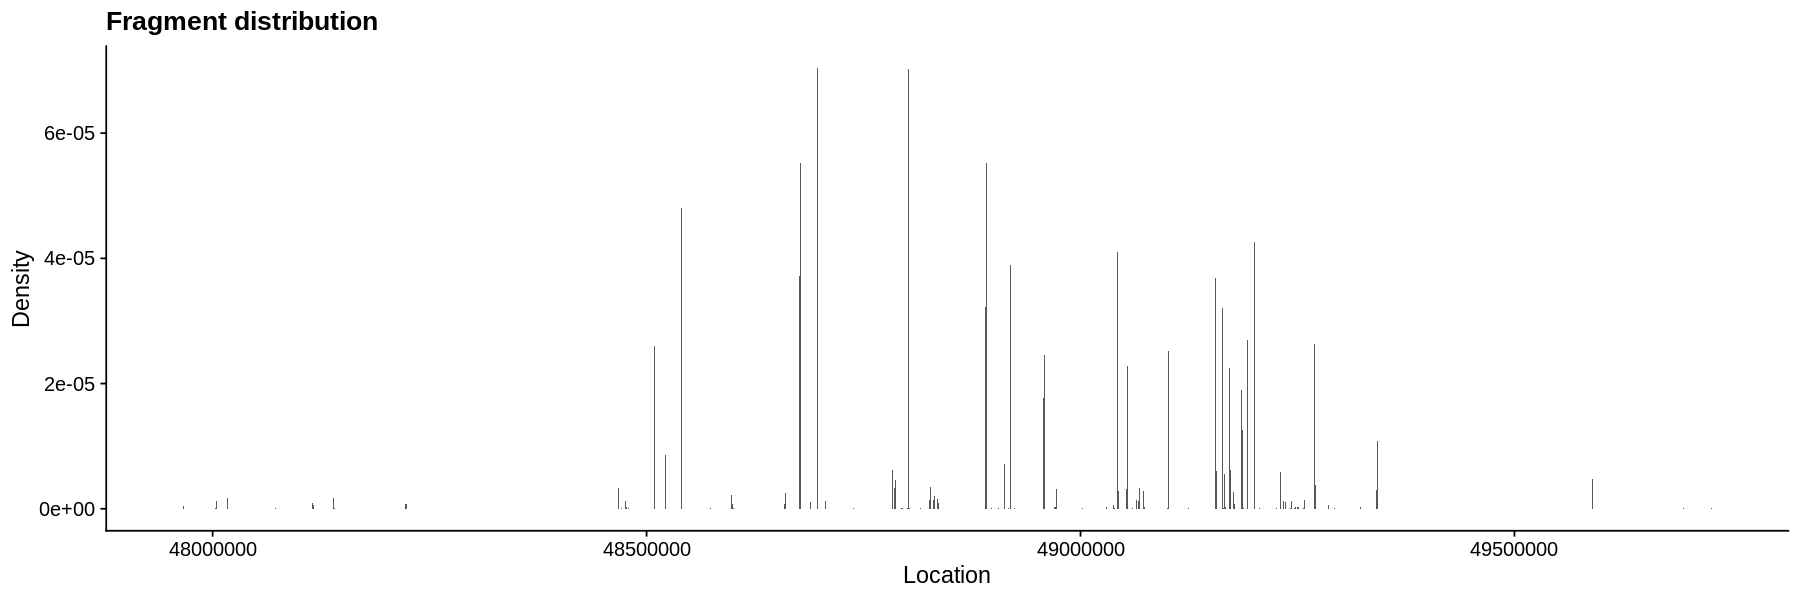

In [68]:
gpt = ggplot(dat, aes(x=Loc)) + 
    geom_histogram(aes(y=..density..), binwidth=1000) + 
    labs(x="Location", y="Density", title="Fragment distribution") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=15)
print(gpt)